# PyTorch Workflow

For solving probelms, we follow the following workflow : -
- Data (preparation & loading)
- Building a model
- Training the model (i.e fitting the model to the data)
- Making predictions & Evaluating the model


Lets try this workflow on a simple model first - **Linear Regression**. 
Then we'll make **MLP, CNN and RNN models**.

# Linear Regresssion : -

## 1. Data Preparation

We can either create data or load it from somewhere. 

# Creating Data 
Let the parameters be - weight =0.8, bias= 0.5

In [1]:
import torch
weight=0.5
bias=0.3

# Creating Data
X = torch.arange(0,10,0.1)
y = weight * X + bias

# adding noise to the data
noise= torch.randn_like(X)*0.1
y_noisy= y + noise


# Splitting the data into train and test sets

In [2]:
# Create train, test split
split_size= int(0.8 * len(X))

torch.manual_seed(42)
random_indexes= torch.randperm(len(X))

X_shuffled = X[random_indexes]
y_shuffled = y_noisy[random_indexes]
X_train, y_train = X_shuffled[:split_size], y_shuffled[: split_size]
X_test, y_test = X_shuffled[split_size:], y_shuffled[split_size:]

# Creating a dataset

You can use **built-in dataset classes** like **MNIST, FashionMNIST, etc.** or create your own **custom datasets** using :

- `Dataset` from `torch.utils.data`
- using utility classes (pre-built dataset classes) like `ImageFolder` for image data.


If your data is already in the form of tensors, is preprocessed, transformed (resizing, augumentaion, etc.) and you basically want to combine it into a dataset, then you can directly use `TensorDataset`.

# DataLoader

After creating dataset, data is loaded using `DataLoader`. 


# Is DataLoader necessary to load data?
Technically, no.
You can manually load data by calling 'dataset[i]' yourself:
But DataLoader is highly recommended because it:

- Handles batching automatically
- Supports shuffling of data each epoch
- Loads data in parallel with multiple workers
- Provides easy iteration over batches
- Handles collating (combining) individual samples into batches


Right now we are creating a simple model, so we wont be using it.   
We'll manually load the data.  
We'll be creating dataset and using dataloaders later for other models.

# 2. Build a Model

In [3]:
# Buidling Model - LinearRegression
from torch import nn
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights= nn.Parameter(torch.randn(1, 
                                               dtype=torch.float, 
                                               requires_grad= True))
        
        self.bias= nn.Parameter(torch.randn(1, 
                                            dtype=torch.float, 
                                            requires_grad= True ))
        
    # Forward pass (defines the computation in the model)
    def forward(self, x : torch.tensor):
        return x* (self.weights) + self.bias


# NOTE: It is neccesary to define these two functions. 
# You can't change the name of the function - forward(). 
# If you do then you'll have to call the function explicilty, just giving input to the model wont work.

In [4]:
# Creating Instance for the model
lr_model = LinearRegression()

# Initial parameters

torch.manual_seed(42)

list(lr_model.parameters())

[Parameter containing:
 tensor([2.5952], requires_grad=True),
 Parameter containing:
 tensor([2.7504], requires_grad=True)]

# 3. Train the model

## Loss function & Optimizer

In [5]:
# Defining loss function
loss_fn = nn.L1Loss()

# Creating an optimizer
optimizer= torch.optim.SGD(params= lr_model.parameters(),
                           lr= 0.01)


## Training & Testing loop

In [6]:
torch.manual_seed(42)
# WE ARE DOING BATCH (FULL) GRADIENT DESCENT

# Number of epochs
e= 700

# Creating empty lists for tracking values
train_loss_val= []
test_loss_val= []
epoch_count = []

for epoch in range(e):

    ## Training

    #Put the model in training mode
    lr_model.train()

    # Forward Pass
    y_pred= lr_model(X_train)

    # Calculate Loss
    loss = loss_fn(y_pred, y_train)

    # Set the gradient to Zero (by defualt it accumulates, so making it 0 before every backward propogation)
    optimizer.zero_grad()

    # Backpropogation
    loss.backward()

    # Update the values
    optimizer.step()

    ## Testing

    # Put on evaluation mode
    lr_model.eval()

    with torch.inference_mode():
      
      # Forward pass on test data
      test_pred = lr_model(X_test)

      # Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print what's happening inside the loop
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_val.append(loss.detach().numpy())
            test_loss_val.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 13.068346977233887 | MAE Test Loss: 11.628995895385742 
Epoch: 10 | MAE Train Loss: 10.400395393371582 | MAE Test Loss: 9.258760452270508 
Epoch: 20 | MAE Train Loss: 7.732438564300537 | MAE Test Loss: 6.888518333435059 
Epoch: 30 | MAE Train Loss: 5.064481735229492 | MAE Test Loss: 4.518276214599609 
Epoch: 40 | MAE Train Loss: 2.396527051925659 | MAE Test Loss: 2.1480376720428467 
Epoch: 50 | MAE Train Loss: 0.8102328181266785 | MAE Test Loss: 0.9201174974441528 
Epoch: 60 | MAE Train Loss: 0.7934404611587524 | MAE Test Loss: 0.9024654626846313 
Epoch: 70 | MAE Train Loss: 0.7775813341140747 | MAE Test Loss: 0.8838046193122864 
Epoch: 80 | MAE Train Loss: 0.761827826499939 | MAE Test Loss: 0.865532398223877 
Epoch: 90 | MAE Train Loss: 0.7462164759635925 | MAE Test Loss: 0.846706211566925 
Epoch: 100 | MAE Train Loss: 0.7305183410644531 | MAE Test Loss: 0.8283351063728333 
Epoch: 110 | MAE Train Loss: 0.714768648147583 | MAE Test Loss: 0.8098980784416199 
E

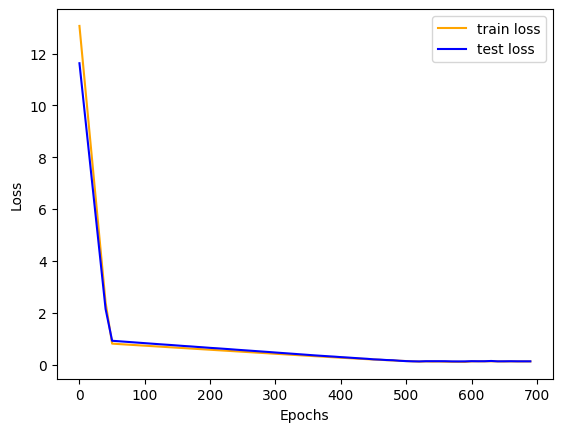

In [7]:
# Plotting loss curves
import matplotlib.pyplot as plt
plt.plot(epoch_count, train_loss_val, c='orange', label='train loss')
plt.plot(epoch_count, test_loss_val, c='b', label= 'test loss')
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()

In [8]:
# Learned Parameters
print(f'the model parameters are - {lr_model.state_dict()} ')

the model parameters are - OrderedDict({'weights': tensor([0.4828]), 'bias': tensor([0.2834])}) 


# 4. Making Predictions & Evaluating the model

In [9]:
# Making predictions

# Set model to evaluation mode
lr_model.eval()

with torch.inference_mode():
    y_preds = lr_model(X_test)

import numpy as np    
y_pred_np= np.array(y_preds)

C:\Users\sriya\AppData\Local\Temp\ipykernel_12208\302270231.py:10: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  y_pred_np= np.array(y_preds)


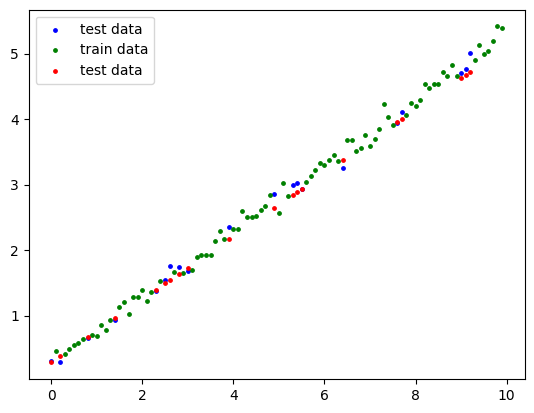

In [10]:
# Visual representation of original data and predicted data

plt.scatter(X_test, y_test, c='b', label='test data', s=6)
plt.scatter(X_train, y_train, c='g', label='train data', s=6)
plt.scatter(X_test, y_pred_np, c='r', label='test data', s=6)
plt.legend()

# Saving and loading a PyTorch model

In [11]:
# Create path for saving a model 

from pathlib import Path

Model_path= Path("models")
Model_path.mkdir(parents=True, exist_ok= True)

model_name="LinearRegressionModel.pth"
model_save_path = Model_path/model_name

# Saving the model state dirc
print(f'Saving modet to: {model_save_path}')
torch.save(obj= lr_model.state_dict(), 
           f= model_save_path)



Saving modet to: models\LinearRegressionModel.pth


In [12]:
# Loading saved model
model_loaded= LinearRegression() #since we only saved the state_dict, we'll have to create another instance of the model

# Load the state_dict of the saved model
model_loaded.load_state_dict(torch.load(f= model_save_path)) 

<All keys matched successfully>

# A simple MLP model

The workflow for creating any model is more or less the same.  
We'll be doing the same process to make other models.

# 1. Data 
If we were to create a custom dataset, then we could do so using `torch.utils.data.Dataset` like this:-

```python 

from torch.utils.data import Dataset
class CustomDataset(Dataset):
    def __init__(self, targ_dir: str, transform=None):

        self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg")) 
        self.transform = transform #transform is a function that defines what changes has to done on the data
        self.classes, self.class_to_idx = find_classes(targ_dir) # if it is a classification problem

    def load_image(self, index: int):
        "Opens an image via a path and returns it."
        image_path = self.paths[index]
        return Image.open(image_path)

    def __len__(self):
        "Returns the total number of samples."
        return len(self.paths)

    def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:         # It is necessary to overwrite this function(__getitem__)
        "Returns one sample of data and label (X, y)."
        img = self.load_image(index)
        class_name  = self.paths[index].parent.name 
        class_idx = self.class_to_idx[class_name]

```
But we'll be using a built-in dataset - MNIST (digits). 

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [14]:
# Load and transform the MNIST dataset

transform = transforms.Compose([
    transforms.ToTensor(),                  # Converts image to PyTorch tensor (shape: C × H × W)
    transforms.Normalize((0.5,), (0.5,))    # Normalize pixel values to range [-1, 1]
])

# Download the training dataset
train_data = datasets.MNIST(
    root='data',             # Folder to store the data
    train=True,              # This is the training set
    download=True,           # Download if not already present
    transform=transform      # Apply transformation to each image
)

# Download the test dataset
test_data = datasets.MNIST(
    root='data',             # Folder to store the data
    train=False,             # This is the test set
    download=True,           # Download if not already present
    transform=transform      # Apply transformation to each image
)


# Create DataLoader for training and test datasets
train_loader = DataLoader(dataset=train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=64, shuffle=False)


In [15]:
# Define a simple MLP model
class SimpleMLP(nn.Module):
    def __init__(self):
        super(SimpleMLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)  # Input layer
        self.fc2 = nn.Linear(128, 64)        # Hidden layer
        self.fc3 = nn.Linear(64, 10)         # Output layer

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the input
        x = torch.relu(self.fc1(x))  # Activation function for first layer
        x = torch.relu(self.fc2(x))  # Activation function for second layer
        x = self.fc3(x)              # Output layer
        return x

In [16]:
# Create an instance of the model
model = SimpleMLP()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Loss function for multi-class classification   
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer with learning rate of 0.001

In [17]:
# Training the model (training loop)
def train(model, train_loader, criterion, optimizer, epochs=5):
    model.train()  # Set the model to training mode
    for epoch in range(epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            optimizer.zero_grad()  # Zero the gradients
            outputs = model(images)  # Forward pass
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()  # Update weights
            running_loss += loss.item() 
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {running_loss / len(train_loader):.4f}')

In [18]:
# Evaluate the model on the test dataset
def evaluate(model, test_loader):
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0
    with torch.no_grad():  # No need to compute gradients during evaluation
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)  # Get the index of the max log-probability
            total += labels.size(0)  # Total number of samples
            correct += (predicted == labels).sum().item()  # Count correct predictions
    accuracy = 100 * correct / total
    print(f'Accuracy of the model on the test dataset: {accuracy:.2f}%')


In [19]:
# Run the training and evaluation
train(model, train_loader, criterion, optimizer, epochs=5)
evaluate(model, test_loader)

# Save the trained model
torch.save(model.state_dict(), 'mnist_mlp.pth')

Epoch [1/5], Loss: 0.3859
Epoch [2/5], Loss: 0.1799
Epoch [3/5], Loss: 0.1333
Epoch [4/5], Loss: 0.1057
Epoch [5/5], Loss: 0.0919
Accuracy of the model on the test dataset: 97.12%


In [20]:
# Visualize some predictions
import matplotlib.pyplot as plt
def visualize_predictions(model, test_loader):
    model.eval()
    with torch.no_grad():
        images, labels = next(iter(test_loader))
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)

        # Plot the first 10 images and their predictions
        fig, axes = plt.subplots(4, 5, figsize=(12, 10))
        for i in range(20):
            ax = axes[i // 5, i % 5]
            ax.imshow(images[i].squeeze(), cmap='gray')
            ax.set_title(f'Predicted: {predicted[i].item()}, Actual: {labels[i].item()}')
            ax.axis('off')
        plt.tight_layout()
        plt.show()

In [21]:
# Using the saved model for predictions
def load_model(model_path):
    model = SimpleMLP()
    model.load_state_dict(torch.load(model_path))
    model.eval()  # Set the model to evaluation mode
    return model

Accuracy of the model on the test dataset: 97.12%


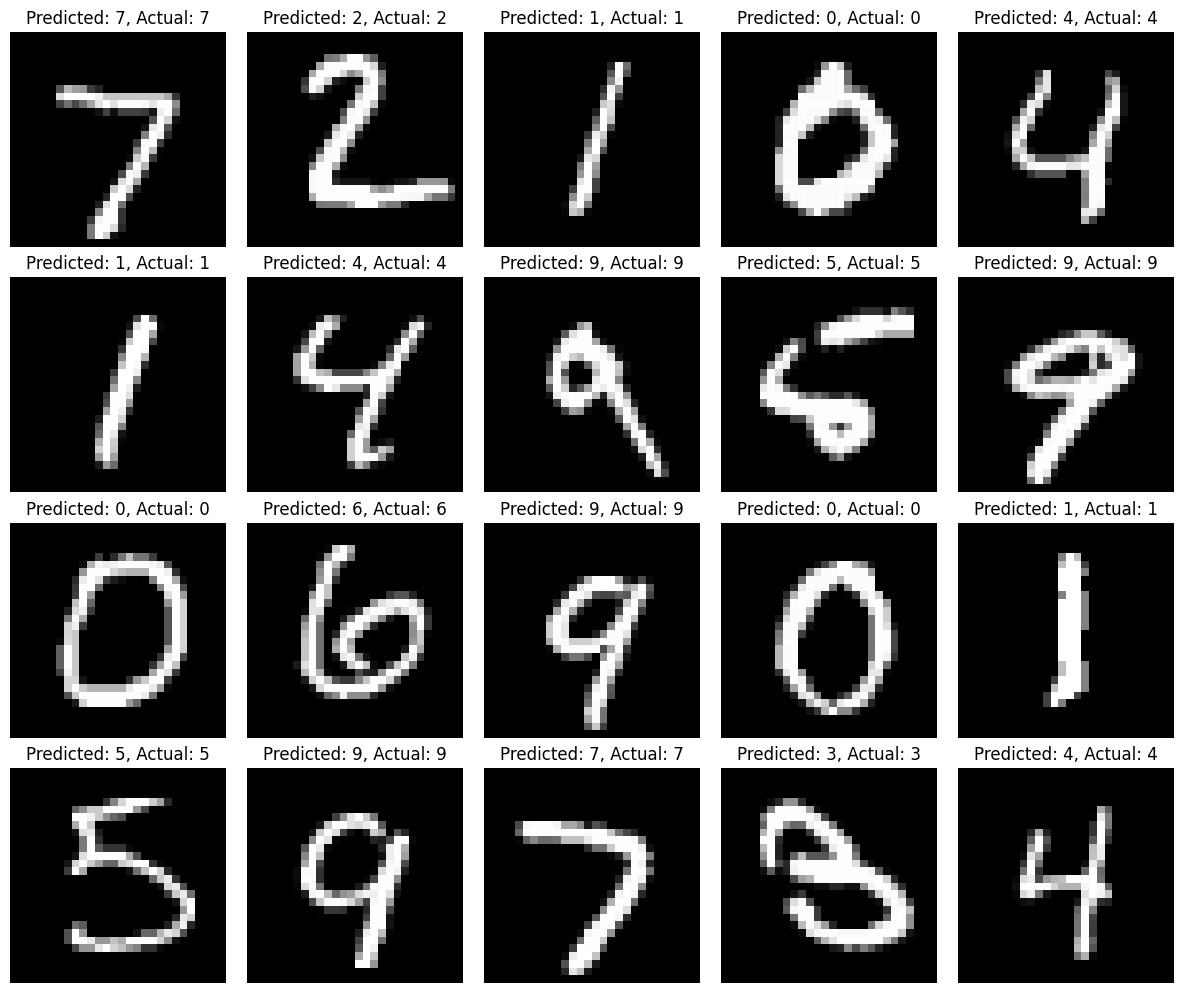

In [22]:
# Load the saved model
loaded_model = load_model('mnist_mlp.pth')

# Test the loaded model
evaluate(loaded_model, test_loader)
# Visualize predictions using the loaded model  
visualize_predictions(loaded_model, test_loader)

# A simple CNN Model

Now, we are creating a simple CNN model on the same dataset.  
Since, we are using the same dataset, we'll skip the initial steps of loading and transforming the data.

In [23]:
# Define a CNN model for MNIST
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)  # Convolutional layer
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)  # Second convolutional layer
        self.fc1 = nn.Linear(64 * 7 * 7, 128)  # Fully connected layer
        self.fc2 = nn.Linear(128, 10)          # Output layer

    def forward(self, x):
        x = torch.relu(self.conv1(x))   # Activation function for first conv layer
        x = torch.max_pool2d(x, 2)      # Max pooling
        x = torch.relu(self.conv2(x))   # Activation function for second conv layer
        x = torch.max_pool2d(x, 2)      # Max pooling
        x = x.view(-1, 64 * 7 * 7)      # Flatten the tensor
        x = torch.relu(self.fc1(x))     # Activation function for first fc layer
        x = self.fc2(x)                 # Output layer
        return x

In [24]:
# Initialize the CNN model
cnn_model = SimpleCNN()
# Define loss function and optimizer for CNN
criterion_cnn = nn.CrossEntropyLoss()  # Loss function for multi-class classification
optimizer_cnn = optim.Adam(cnn_model.parameters(), lr=0.001)  # Adam optimizer with learning rate of 0.001

In [25]:
# Train the CNN model
def train_cnn(model, train_loader, criterion, optimizer, epochs=5):
    model.train()  # Set the model to training mode
    for epoch in range(epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            optimizer.zero_grad()  # Zero the gradients
            outputs = model(images)  # Forward pass
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {running_loss / len(train_loader):.4f}')


In [26]:
# Evaluate the CNN model on the test dataset
def evaluate_cnn(model, test_loader):
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0
    with torch.no_grad():  # No need to compute gradients during evaluation
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)  # Get the index of the max log-probability
            total += labels.size(0)  # Total number of samples
            correct += (predicted == labels).sum().item()  # Count correct predictions
    accuracy = 100 * correct / total
    print(f'Accuracy of the CNN model on the test dataset: {accuracy:.2f}%')

In [27]:
# Run the training and evaluation for the CNN model
train_cnn(cnn_model, train_loader, criterion_cnn, optimizer_cnn, epochs=5)
evaluate_cnn(cnn_model, test_loader)
# Save the trained CNN model
torch.save(cnn_model.state_dict(), 'mnist_cnn.pth')

Epoch [1/5], Loss: 0.1559
Epoch [2/5], Loss: 0.0463
Epoch [3/5], Loss: 0.0308
Epoch [4/5], Loss: 0.0215
Epoch [5/5], Loss: 0.0182
Accuracy of the CNN model on the test dataset: 99.07%


In [28]:
# Using the saved CNN model for predictions
def load_cnn_model(model_path):
    model = SimpleCNN()
    model.load_state_dict(torch.load(model_path))
    model.eval()
    return model

Accuracy of the CNN model on the test dataset: 99.07%


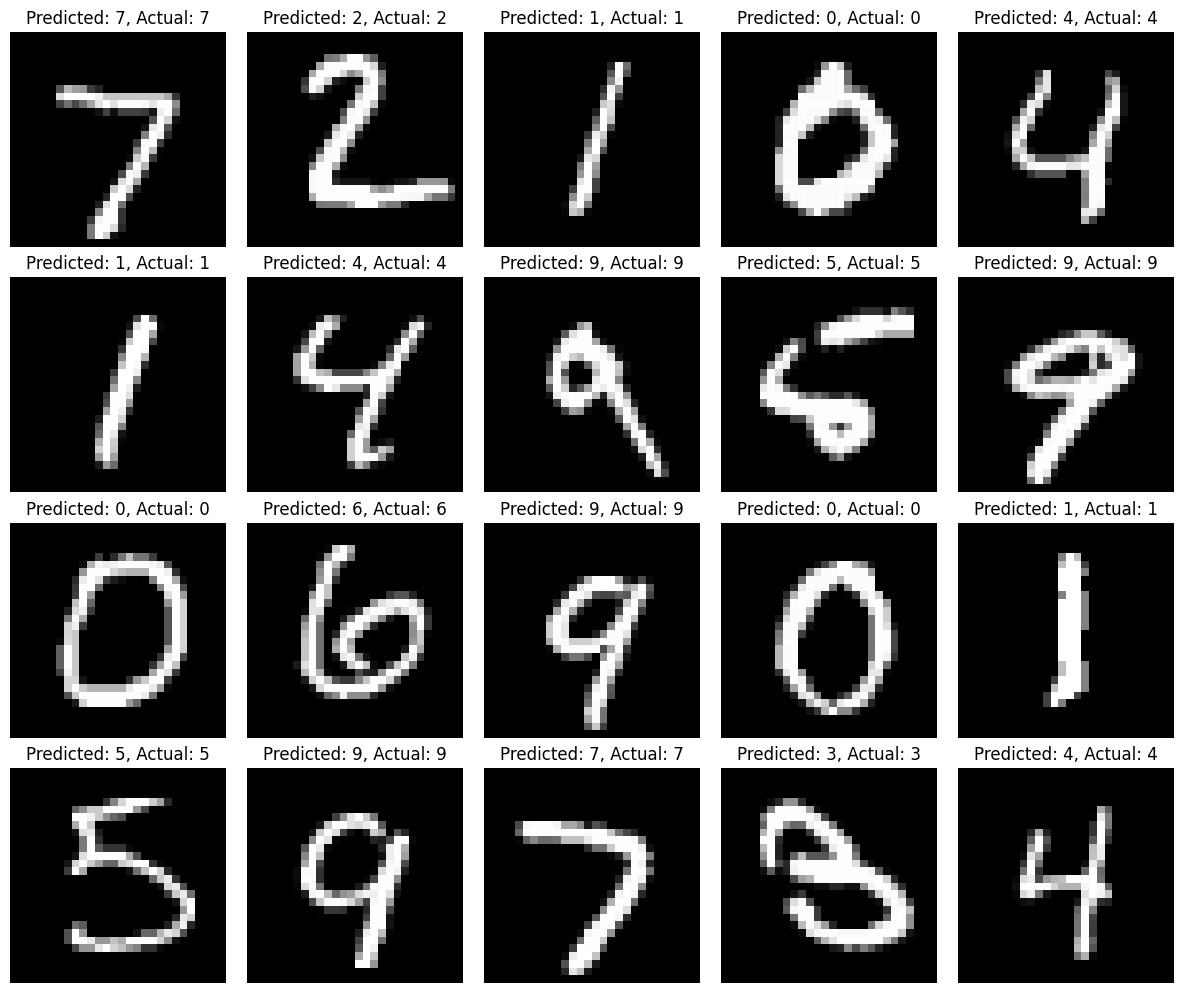

In [29]:
# Load the saved CNN model
loaded_cnn_model = load_cnn_model('mnist_cnn.pth')
# Test the loaded CNN model 
evaluate_cnn(loaded_cnn_model, test_loader)
# Visualize predictions using the loaded CNN model
visualize_predictions(loaded_cnn_model, test_loader) 

# Comparing the two models : -

- **Accuracy:**  
    MLP: ~97% accuracy  
    CNN: ~99.07% accuracy  

    CNN performs better in accuracy because it captures spatial patterns and local features in images much better than a simple MLP that treats pixels independently.  

- **Loss:**  
    CNN’s loss decreases faster and to a smaller value (0.0185) than MLP’s (0.0939), showing it learns more precise representations.  

- **Training Time:**  
    MLP: ~49 seconds  
    CNN: ~127 seconds (2m 6.8s)  

    CNN takes roughly 2.5 times longer due to the convolution operations, more layers, and possibly less optimized hardware usage (likely CPU).  

# A simple RNN model 
Again we will make a model for the same MNIST digit classification task.  
RNN models are actually used for sequential data like text, audio, etc.  
But we will use it for a digit classification task just to demonstrates how to implement an RNN for a data.

In [30]:
# Define the RNN model for MNIST
class SimpleRNN(nn.Module):
    def __init__(self, input_size=28, hidden_size=128, output_size=10):
        super(SimpleRNN, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)  # RNN layer
        self.fc = nn.Linear(hidden_size, output_size)  # Fully connected layer

    def forward(self, x):
        x = x.view(-1, 28, 28)  # Reshape to (batch_size, sequence_length, input_size)
        out, _ = self.rnn(x)  # Forward pass through RNN
        out = out[:, -1, :]  # Take the output of the last time step
        out = self.fc(out)  # Fully connected layer
        return out

In [31]:
# Initialize the RNN model (same as before)
rnn_model = SimpleRNN()
# Define loss function and optimizer for RNN
criterion_rnn = nn.CrossEntropyLoss()  # Loss function for multi-class classification
optimizer_rnn = optim.Adam(rnn_model.parameters(), lr=0.001)  # Adam optimizer with learning rate of 0.001

In [32]:
# Train the RNN model (same as before)
def train_rnn(model, train_loader, criterion, optimizer, epochs=5):
    model.train()  # Set the model to training mode
    for epoch in range(epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            optimizer.zero_grad()  # Zero the gradients
            outputs = model(images)  # Forward pass
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {running_loss / len(train_loader):.4f}')

In [33]:
# Evaluate the RNN model on the test dataset
def evaluate_rnn(model, test_loader):
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0
    with torch.no_grad():  # No need to compute gradients during evaluation
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)  # Get the index of the max log-probability
            total += labels.size(0)  # Total number of samples
            correct += (predicted == labels).sum().item()  # Count correct predictions
    accuracy = 100 * correct / total
    print(f'Accuracy of the CNN model on the test dataset: {accuracy:.2f}%')


In [34]:
# Run the training and evaluation for the RNN model
train_rnn(rnn_model, train_loader, criterion_rnn, optimizer_rnn, epochs=5)
evaluate_cnn(rnn_model, test_loader)
# Save the trained RNN model   
torch.save(rnn_model.state_dict(), 'mnist_rnn.pth')

Epoch [1/5], Loss: 0.7473
Epoch [2/5], Loss: 0.3439
Epoch [3/5], Loss: 0.2437
Epoch [4/5], Loss: 0.1998
Epoch [5/5], Loss: 0.1721
Accuracy of the CNN model on the test dataset: 95.55%


In [35]:
# Using the saved RNN model for predictions
def load_rnn_model(model_path):
    model = SimpleRNN()
    model.load_state_dict(torch.load(model_path))
    model.eval()
    return model


Accuracy of the CNN model on the test dataset: 95.55%


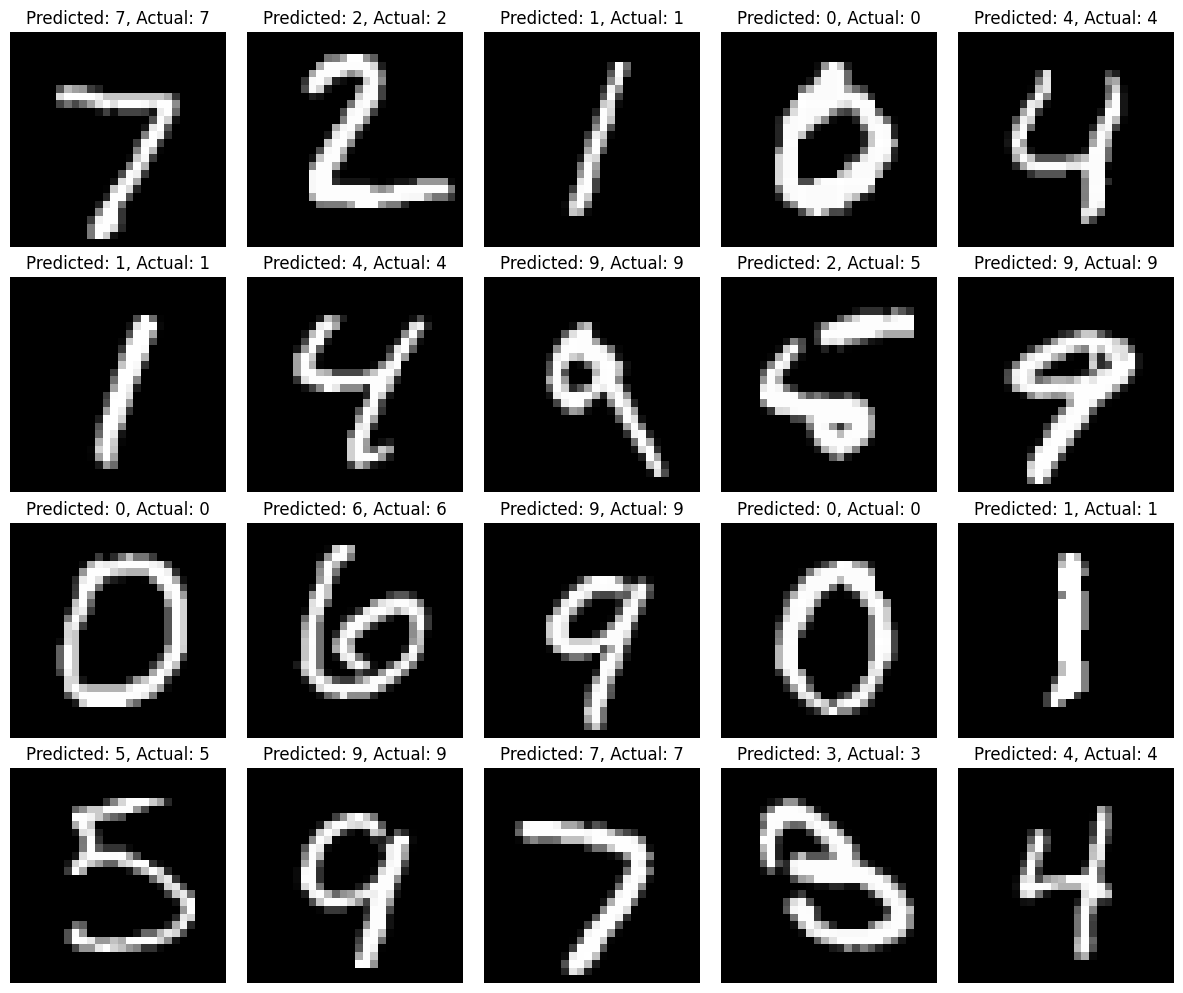

In [36]:
# Load the saved RNN model
loaded_rnn_model = load_rnn_model('mnist_rnn.pth')
# Test the loaded RNN model
evaluate_cnn(loaded_rnn_model, test_loader)
# Visualize predictions using the loaded RNN model
visualize_predictions(loaded_rnn_model, test_loader)

**Note:** The RNN model may not perform as well on MNIST as CNNs or MLPs due to the nature of the data.
However, it demonstrates how to implement an RNN for sequence data.

# Comparision of the three models: -

|Model  | Final Loss | Accuracy(%) | Time taken |  
|-------|------------|-------------|------------|
|MLP    | 0.0939     |  96.99%       | 48.7s|  
|CNN    | 0.0185     |  99.07%       | 2m 6.8s|
|RNN    | 0.1791     |  95.43%       | 1m 21.2s|

**Why ?**

**MLP** - Treats pixels independently, so misses spatial structure, yet still performs decently due to MNIST's simplicity.  
**CNN** - Captures spatial features like edges, patterns; most suited for images. Hence, highest accuracy and lowest loss.  
**RNN** - Can extract some sequential patterns row-wise, but loses a lot of spatial info. Better than expected, but not ideal for image tasks.
